IMPORTING LIBRARIES
-

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

READING DATASET OF LINEAR REGRESSION
- 

In [5]:
data=pd.read_csv(r"D:\QDEESA\BSAI\4th smester\machine learning\ml lab\cardatalinear.csv")

In [6]:
data.shape

(301, 9)

PREPROCESSING STEPS
- 

Handling missing values
- 

In [14]:
data.dropna(inplace=True)
missing_values = data.isnull().sum()
print(missing_values)


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


Outlier detection and removal
- 

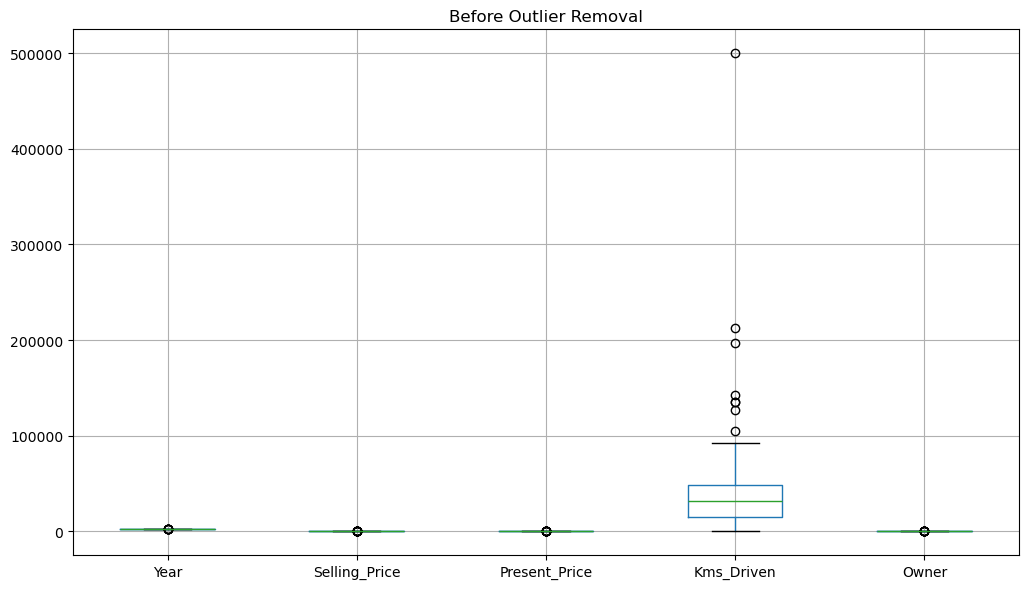

In [7]:
numeric_cols = data.select_dtypes(include=[np.number])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1       

data_cleaned = data[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
numeric_cols.boxplot()
plt.title("Before Outlier Removal")

plt.tight_layout()
plt.show()


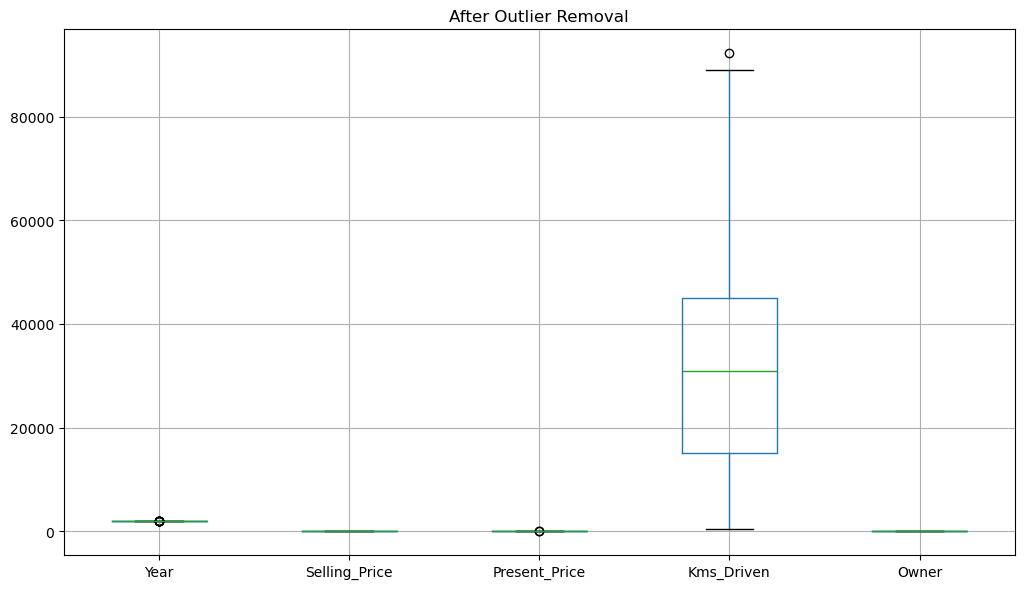

In [8]:
plt.figure(figsize=(20, 6))

# Box plot after removing outliers
plt.subplot(1, 2, 2)
data_cleaned.select_dtypes(include=[np.number]).boxplot()
plt.title("After Outlier Removal")

plt.tight_layout()
plt.show()


In [24]:
print("Before outlier removal data is (row,column) ")
print(data.shape)
print("After outlier removal data is (row,column)")
print(data_cleaned.shape)

Before outlier removal data is (row,column) 
(301, 9)
After outlier removal data is (row,column)
(264, 9)


Data normalization
- 

In [15]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])

scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)


scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)

scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)

print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()


(301, 9)

************************************************************


,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name,Fuel_Type,Seller_Type,Transmission
0,0.733333,0.093123,0.057109,0.053053,0.0,ritz,Petrol,Dealer,Manual
1,0.666667,0.133238,0.099913,0.085085,0.0,sx4,Diesel,Dealer,Manual
2,0.933333,0.204871,0.103273,0.012813,0.0,ciaz,Petrol,Dealer,Manual
3,0.533333,0.078797,0.041504,0.009409,0.0,wagon r,Petrol,Dealer,Manual
4,0.733333,0.128940,0.070980,0.083984,0.0,swift,Diesel,Dealer,Manual


Data standardization
- 

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])

scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)

scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)
scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)

print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()

(301, 9)

************************************************************


,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name,Fuel_Type,Seller_Type,Transmission
0,0.128897,-0.258416,-0.236215,-0.256224,-0.174501,ritz,Petrol,Dealer,Manual
1,-0.217514,0.017481,0.221505,0.155911,-0.174501,sx4,Diesel,Dealer,Manual
2,1.168129,0.510154,0.257427,-0.773969,-0.174501,ciaz,Petrol,Dealer,Manual
3,-0.910335,-0.356950,-0.403079,-0.817758,-0.174501,wagon r,Petrol,Dealer,Manual
4,0.128897,-0.012079,-0.087890,0.141743,-0.174501,swift,Diesel,Dealer,Manual


Data splitting
- 

In [9]:
from sklearn.model_selection import train_test_split

X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((210, 8), (91, 8), (210,), (91,))